In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
# read in the two csv files
csv1 = pd.read_csv('SeparateProteinIDs_classic_no_grouping_no_remap.csv')
csv2 = pd.read_csv('UniprotHumanProteome.csv')

# merge the two csv files on a common column
merged_csv = pd.merge(csv1, csv2, on='Protein Uniprot')

print(merged_csv)
# save the merged csv to a file
merged_csv.to_csv('MergedHumanProteome-ClassicNoGroupingNoRemap.csv', index=False)

       Unnamed: 0   Q-value Protein Type Protein Uniprot Protein Label  \
0               0  0.000535           sp          P35527    K1C9_HUMAN   
1            4183  0.042331      REV__sp          P35527    K1C9_HUMAN   
2               1  0.000535           sp          P35908    K22E_HUMAN   
3            4789  0.111060      REV__sp          P35908    K22E_HUMAN   
4               2  0.000535           sp          P67809   YBOX1_HUMAN   
...           ...       ...          ...             ...           ...   
28882       55553  1.060446           sp      A0A494C0Y3   F246A_HUMAN   
28883       55561  1.060459      REV__sp          Q9P0W8   SPAT7_HUMAN   
28884       55569  1.060459           sp          Q15051   IQCB1_HUMAN   
28885       55578  1.060459      REV__sp          Q92793     CBP_HUMAN   
28886       55580  1.060459      REV__sp      A0A096LP01   SIM26_HUMAN   

                                           Protein names  Length    Mass  
0      Keratin, type I cytoskeletal 

In [15]:
# check for duplicate mappings
duplicates = merged_csv.duplicated(subset=['Protein Uniprot', 'Protein Uniprot'], keep=False)

# print out the duplicate mappings
print('Duplicate mappings:')
print(merged_csv[duplicates])

Duplicate mappings:
       Unnamed: 0   Q-value Protein Type Protein Uniprot Protein Label  \
0               0  0.000535           sp          P35527    K1C9_HUMAN   
1            4183  0.042331      REV__sp          P35527    K1C9_HUMAN   
2               1  0.000535           sp          P35908    K22E_HUMAN   
3            4789  0.111060      REV__sp          P35908    K22E_HUMAN   
4               2  0.000535           sp          P67809   YBOX1_HUMAN   
...           ...       ...          ...             ...           ...   
28745       55214  1.059949           sp          Q9H7D7   WDR26_HUMAN   
28797       54636  1.058492           sp          P05019    IGF1_HUMAN   
28798       54910  1.059163      REV__sp          P05019    IGF1_HUMAN   
28808       54754  1.058808      REV__sp          Q9H9P2   CHODL_HUMAN   
28809       54949  1.059372           sp          Q9H9P2   CHODL_HUMAN   

                                           Protein names  Length   Mass  
0      Keratin, t

In [4]:
df = pd.read_csv('MergedHumanProteome-ClassicNoGroupingNoRemap.csv')

# filter for Q-value < 0.01
df_filtered = df[df['Q-value'] < 0.01]

print(df_filtered)
df_filtered.to_csv('MergedHumanProteome-ClassicNoGroupingNoRemapQ-valuefilter.csv', index=False)

      Unnamed: 0   Q-value Protein Type Protein Uniprot Protein Label  \
0              0  0.000535           sp          P35527    K1C9_HUMAN   
2              1  0.000535           sp          P35908    K22E_HUMAN   
4              2  0.000535           sp          P67809   YBOX1_HUMAN   
6              3  0.000535           sp          P09972   ALDOC_HUMAN   
8              4  0.000535           sp          P14550   AK1A1_HUMAN   
...          ...       ...          ...             ...           ...   
6957        3764  0.009378           sp          Q9H5K3   SG196_HUMAN   
6959        3765  0.009644      REV__sp          A6NL88   SHSA7_HUMAN   
6961        3766  0.009644           sp          Q8N6Q8   MET25_HUMAN   
6963        3768  0.009906           sp          Q5SXM2   SNPC4_HUMAN   
6965        3769  0.009906           sp          Q0VF96   CGNL1_HUMAN   

                                          Protein names  Length    Mass  
0     Keratin, type I cytoskeletal 9 (Cytokeratin

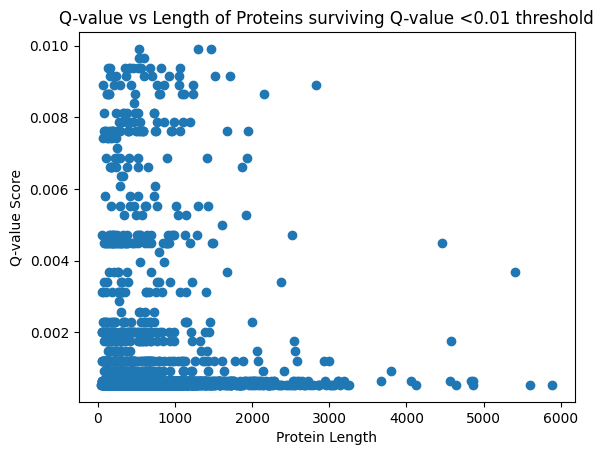

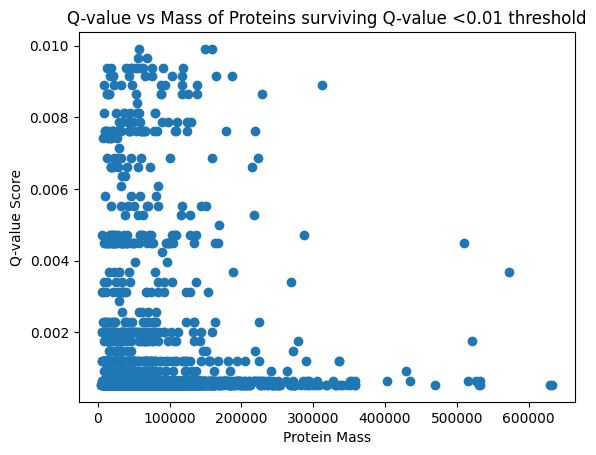

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the merged CSV file into a pandas DataFrame
data = pd.read_csv("MergedHumanProteome-ClassicNoGroupingNoRemapQ-valuefilter.csv")

# Create a scatter plot of q-value vs length
plt.scatter(data["Length"], data["Q-value"])
plt.title('Q-value vs Length of Proteins surviving Q-value <0.01 threshold')
plt.xlabel("Protein Length")
plt.ylabel("Q-value Score")
plt.show()

# Create a scatter plot of q-value vs mass
plt.scatter(data["Mass"], data["Q-value"])
plt.title('Q-value vs Mass of Proteins surviving Q-value <0.01 threshold')
plt.xlabel("Protein Mass")
plt.ylabel("Q-value Score")
plt.show()

Intercept: 0.0009922619088032077
Slope: 9.021205089565112e-10


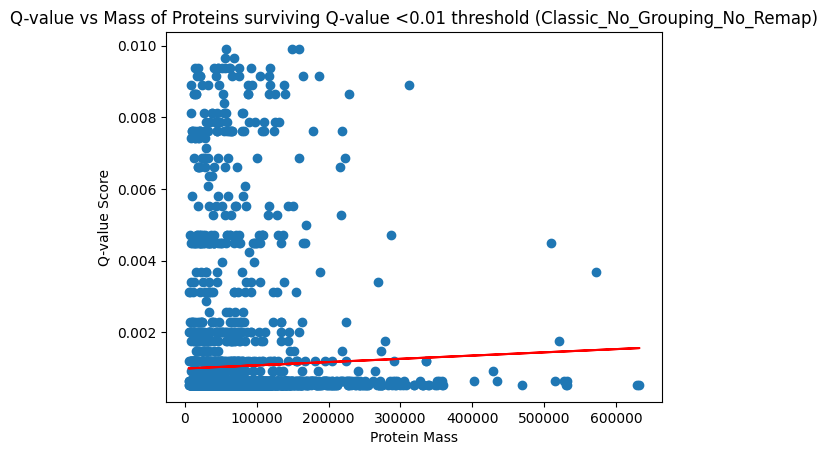

In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Load the merged CSV file into a pandas DataFrame
data = pd.read_csv("MergedHumanProteome-ClassicNoGroupingNoRemapQ-valuefilter.csv")

# Extract mass and q-value columns
Mass = data["Mass"]
Q_value = data["Q-value"]

# Convert mass and q-value data to numpy arrays and reshape them
Mass = np.array(Mass).reshape((-1, 1))
Q_value = np.array(Q_value)

# Create a linear regression model and fit the data
model = LinearRegression()
model.fit(Mass, Q_value)

# Print the intercept and slope of the linear regression line
print("Intercept:", model.intercept_)
print("Slope:", model.coef_[0])

# Plot the data and the linear regression line
plt.scatter(Mass, Q_value)
plt.plot(Mass, model.predict(Mass), color='red')
plt.title('Q-value vs Mass of Proteins surviving Q-value <0.01 threshold (Classic_No_Grouping_No_Remap)')
plt.xlabel("Protein Mass")
plt.ylabel("Q-value Score")
plt.show()

Intercept: 0.0009902482844912268
Slope: 1.0457365125535518e-07


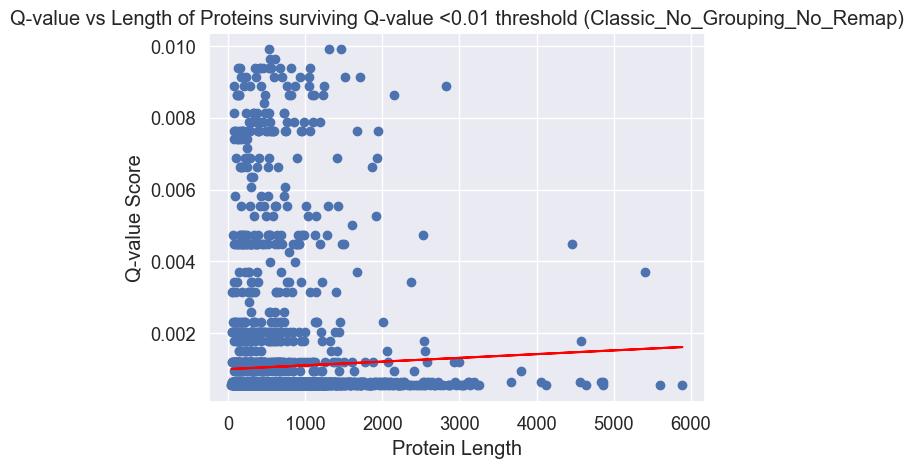

In [17]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Load the merged CSV file into a pandas DataFrame
data = pd.read_csv("MergedHumanProteome-ClassicNoGroupingNoRemapQ-valuefilter.csv")

# Extract mass and q-value columns
Length = data["Length"]
Q_value = data["Q-value"]

# Convert mass and q-value data to numpy arrays and reshape them
Length = np.array(Length).reshape((-1, 1))
Q_value = np.array(Q_value)

# Create a linear regression model and fit the data
model = LinearRegression()
model.fit(Length, Q_value)

# Print the intercept and slope of the linear regression line
print("Intercept:", model.intercept_)
print("Slope:", model.coef_[0])

# Plot the data and the linear regression line
plt.scatter(Length, Q_value)
plt.plot(Length, model.predict(Length), color='red')
plt.title('Q-value vs Length of Proteins surviving Q-value <0.01 threshold (Classic_No_Grouping_No_Remap)')
plt.xlabel("Protein Length")
plt.ylabel("Q-value Score")
plt.show()

In [8]:
import pandas as pd
import numpy as np

# Load the merged CSV file into a pandas DataFrame
data = pd.read_csv("MergedHumanProteome-ClassicNoGroupingNoRemapQ-valuefilter.csv")

# Extract protein mass, protein length, and q-value columns
mass = data["Mass"]
length = data["Length"]
q_value = data["Q-value"]

# Calculate the covariance matrix
cov_matrix = np.cov([mass, length, q_value])

# Print the covariance matrix
print("Covariance Matrix:")
print(cov_matrix)

Covariance Matrix:
[[3.44142580e+09 3.08451162e+07 3.10458080e+00]
 [3.08451162e+07 2.76863209e+05 2.89525966e-02]
 [3.10458080e+00 2.89525966e-02 2.37362465e-06]]


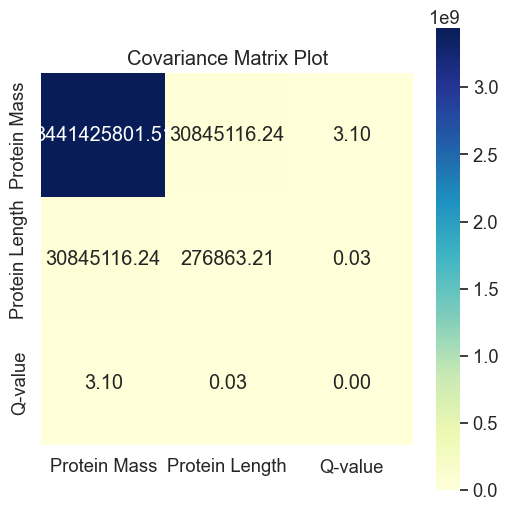

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the merged CSV file into a pandas DataFrame
data = pd.read_csv("MergedHumanProteome-ClassicNoGroupingNoRemapQ-valuefilter.csv")

# Extract protein mass, protein length, and q-value columns
mass = data["Mass"]
length = data["Length"]
q_value = data["Q-value"]

# Calculate the covariance matrix
cov_matrix = np.cov([mass, length, q_value])

# Create a heatmap plot of the covariance matrix
sns.set(font_scale=1.2)
plt.figure(figsize=(6, 6))
sns.heatmap(cov_matrix, annot=True, cmap="YlGnBu", fmt=".2f", square=True,
            xticklabels=["Protein Mass", "Protein Length", "Q-value"],
            yticklabels=["Protein Mass", "Protein Length", "Q-value"])
plt.title("Covariance Matrix Plot")
plt.show()

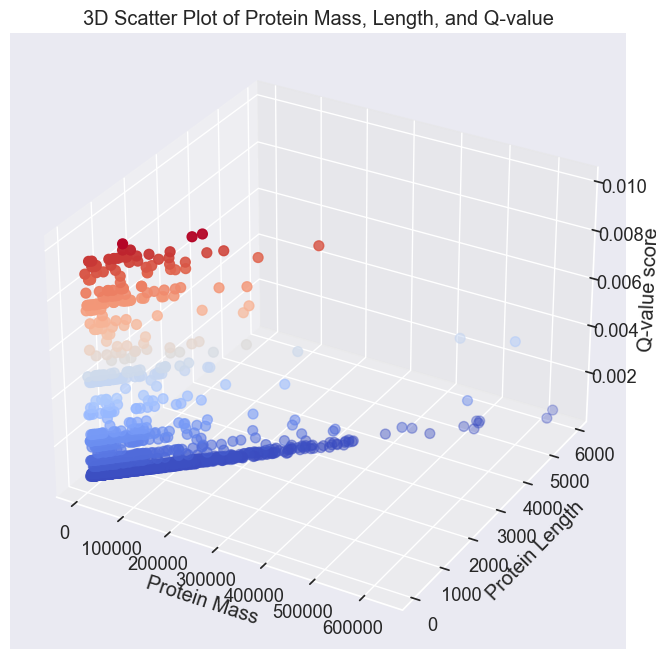

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load the merged CSV file into a pandas DataFrame
data = pd.read_csv("MergedHumanProteome-ClassicNoGroupingNoRemapQ-valuefilter.csv")

# Extract protein mass, protein length, and q-value columns
mass = data["Mass"]
length = data["Length"]
q_value = data["Q-value"]

# Create a 3D scatter plot of the three variables
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(mass, length, q_value, c=q_value, cmap="coolwarm", s=50)
ax.set_xlabel("Protein Mass")
ax.set_ylabel("Protein Length")
ax.set_zlabel("Q-value score")
plt.title("3D Scatter Plot of Protein Mass, Length, and Q-value")
plt.show() 

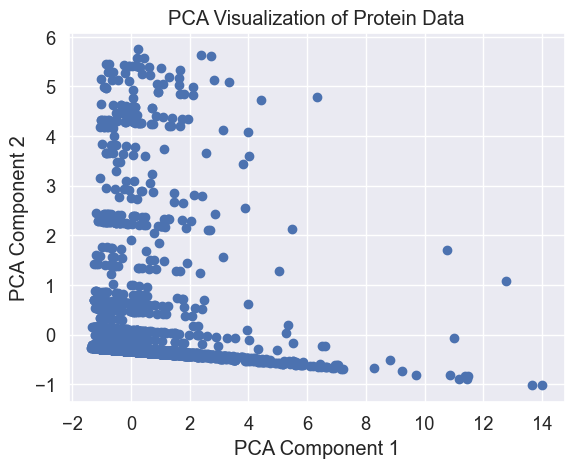

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Load the data
data = pd.read_csv("MergedHumanProteome-ClassicNoGroupingNoRemapQ-valuefilter.csv")

# Extract the relevant columns
X = data[['Mass', 'Length', 'Q-value']]

# Standardize the data
X = (X - X.mean()) / X.std()

# Perform PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot the results
plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA Visualization of Protein Data')
plt.show()